In [1]:
import pandas as pd

df = pd.read_csv("E:/bookReccomendationSystem/data/books.csv", on_bad_lines='skip')
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [2]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [3]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [4]:
df['authors'].unique().size
# Number of Authors in dataset #

6639

In [5]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

Text(0.5, 0, 'Average rating')

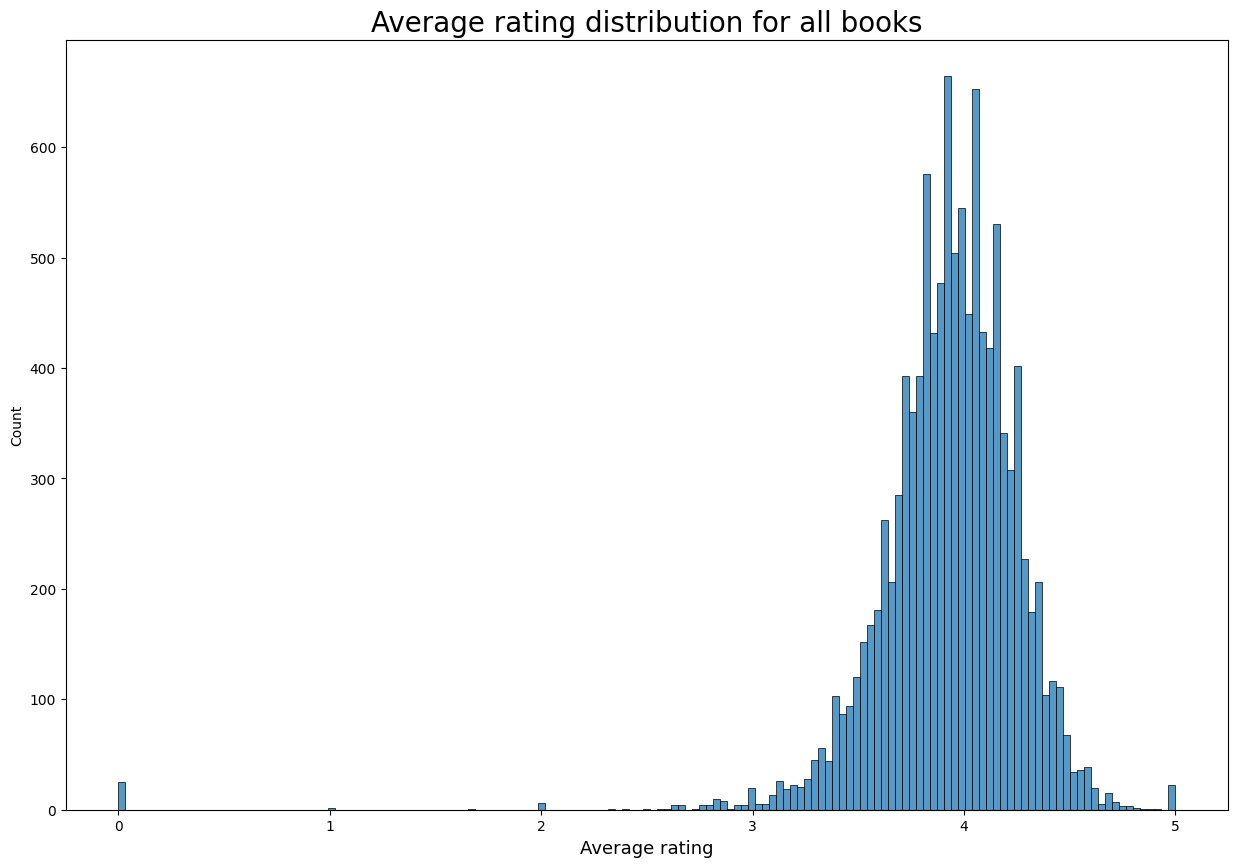

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

df.average_rating = df.average_rating.astype(float)
fig, ax = plt.subplots(figsize=[15,10])
sns.histplot(df['average_rating'],ax=ax)
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

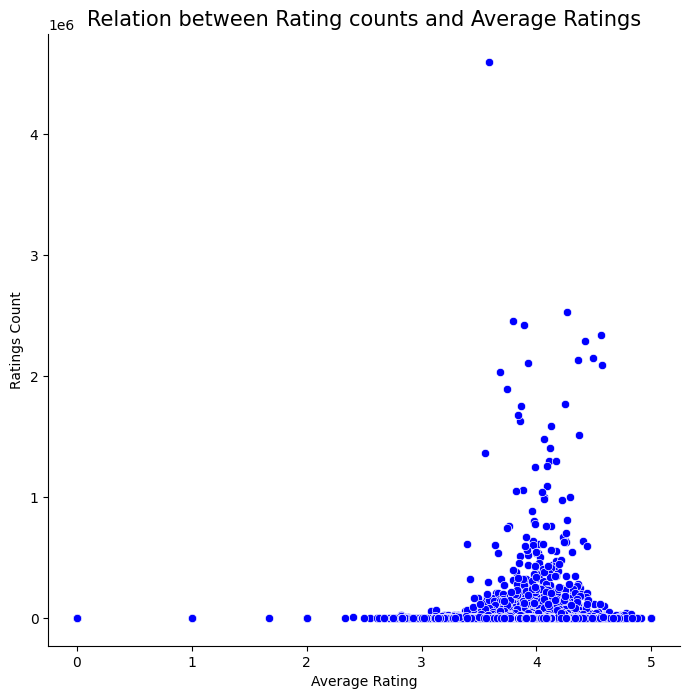

In [7]:
ax = sns.relplot(data=df, x="average_rating", y="ratings_count", color = 'blue', sizes=(100, 200), height=7, marker='o')
plt.title("Relation between Rating counts and Average Ratings",fontsize = 15)
ax.set_axis_labels("Average Rating", "Ratings Count")

<Figure size 1500x1000 with 0 Axes>

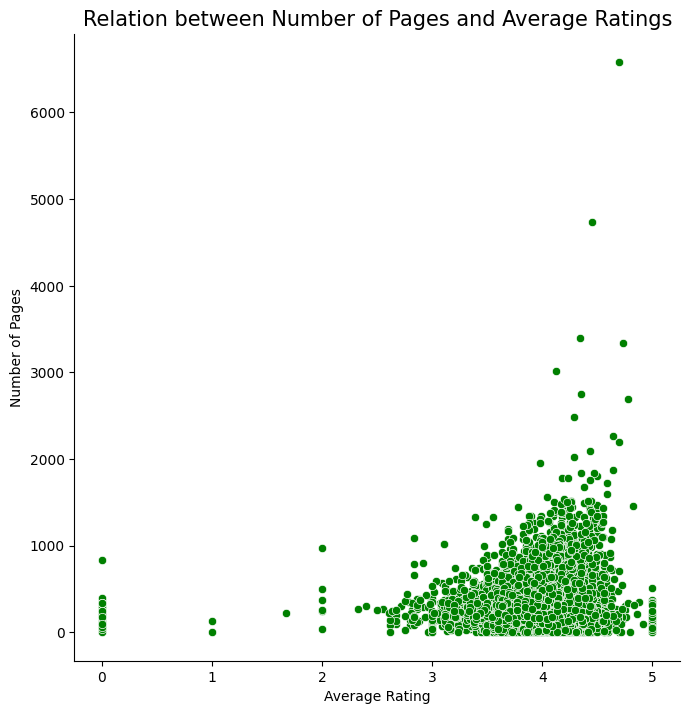

In [8]:
plt.figure(figsize=(15,10))
ax = sns.relplot(x="average_rating", y="  num_pages", data = df, color = 'green',sizes=(100, 200), height=7, marker='o')
plt.title("Relation between Number of Pages and Average Ratings",fontsize = 15)
ax.set_axis_labels("Average Rating", "Number of Pages")

In [9]:
authorsWithMostBooks = df.groupby('authors')['title'].count()
authorsWithMostBooks.reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
# Top 10 Authors with most books #



,title
authors,
Stephen King,40
P.G. Wodehouse,40
Rumiko Takahashi,39
Orson Scott Card,35
Agatha Christie,33
Piers Anthony,30
Mercedes Lackey,29
Sandra Brown,29
Dick Francis,28


In [10]:
authorsWithMostAvgRating = pd.DataFrame()
authorsWithMostAvgRating['Number of Ratings'] = df.groupby('authors')['average_rating'].count()
authorsWithMostAvgRating['Sum of Ratings'] = df.groupby('authors')['average_rating'].sum()

authorsWithMostAvgRating['Average Rating'] = (authorsWithMostAvgRating['Sum of Ratings'] / authorsWithMostAvgRating['Number of Ratings'])
#authorsWithMostAvgRating.head()
authorsWithMostAvgRating.reset_index().sort_values('Average Rating', ascending=False).head(10).set_index('authors')

authorsWithMostAvgRating.loc[authorsWithMostAvgRating['Number of Ratings'] > 20].sort_values('Average Rating', ascending=False).head(10)

# Top 10 Authors with Most Average Rating having Number of Ratings for each Book > 20  #

,Number of Ratings,Sum of Ratings,Average Rating
authors,,,
Rumiko Takahashi,39,163.28,4.186667
P.G. Wodehouse,40,165.89,4.147250
Terry Pratchett,23,94.60,4.113043
Mercedes Lackey,29,117.14,4.039310
Agatha Christie,33,131.64,3.989091
Laurell K. Hamilton,23,91.74,3.988696
Stephen King,40,158.94,3.973500
Janet Evanovich,21,83.37,3.970000
Dick Francis,28,110.94,3.962143
